In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

Load the cleaned data

In [30]:
df = pd.read_csv('data/sales_clean.csv')
df.head(5)

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,-0.604777,-0.421915,0.64,1,1.670243
1,-0.866449,0.010377,0.90,0,-0.030858
2,-0.925325,-0.800171,0.61,1,0.903649
3,-0.931867,-0.475412,0.85,0,1.732912
4,-0.895717,-0.746135,0.65,1,0.724909


In [31]:
X = df.drop('rating',axis=1).values
X

array([[-0.60477721, -0.42191545,  0.64      ,  1.67024343],
       [-0.86644865,  0.01037665,  0.9       , -0.03085835],
       [-0.92532473, -0.80017104,  0.61      ,  0.90364937],
       ...,
       [ 1.77643296,  0.64854786,  0.28      , -0.80744604],
       [ 0.70358003,  0.00551336,  0.26      , -0.02013603],
       [ 2.61901502,  0.97817058,  0.22      , -0.12881667]])

In [32]:
X_vis = df[['discount_percentage', 'rating_count']].values
X_vis

array([[ 0.64      ,  1.67024343],
       [ 0.9       , -0.03085835],
       [ 0.61      ,  0.90364937],
       ...,
       [ 0.28      , -0.80744604],
       [ 0.26      , -0.02013603],
       [ 0.22      , -0.12881667]])

In [33]:
y = df['rating'].values
y

array([1, 0, 1, ..., 0, 1, 1])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_vis_train, X_vis_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=11)

Kernel: sigmoid

              precision    recall  f1-score   support

           0       0.31      0.12      0.18        41
           1       0.64      0.80      0.71       132
           2       0.17      0.13      0.15        31

    accuracy                           0.56       204
   macro avg       0.37      0.35      0.34       204
weighted avg       0.50      0.56      0.52       204



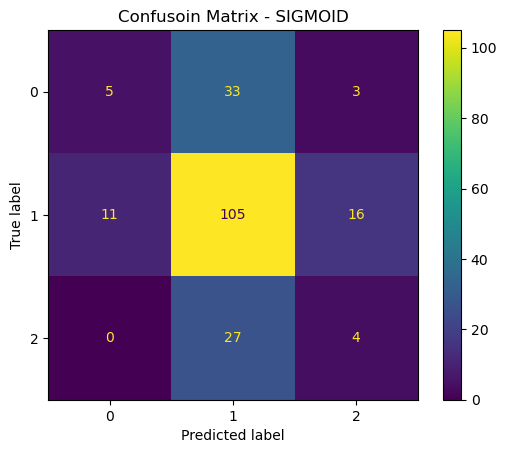

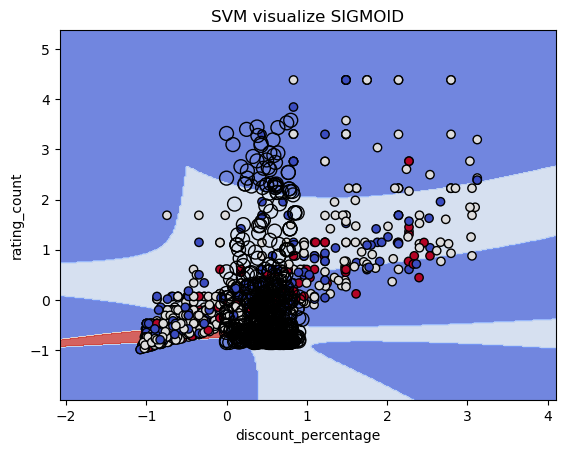

Kernel: poly

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.65      1.00      0.79       132
           2       0.00      0.00      0.00        31

    accuracy                           0.65       204
   macro avg       0.22      0.33      0.26       204
weighted avg       0.42      0.65      0.51       204



/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

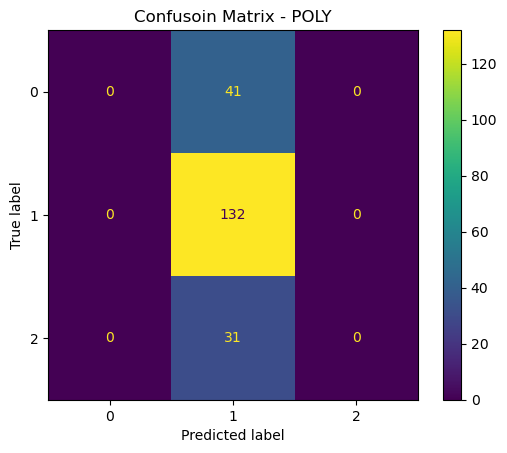

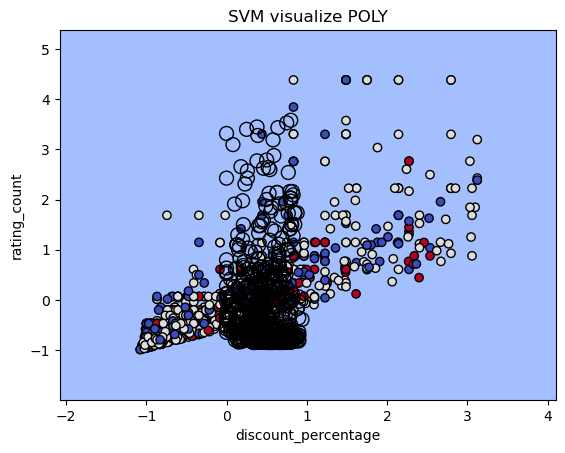

Kernel: rbf

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.65      1.00      0.79       132
           2       0.00      0.00      0.00        31

    accuracy                           0.65       204
   macro avg       0.22      0.33      0.26       204
weighted avg       0.42      0.65      0.51       204



/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

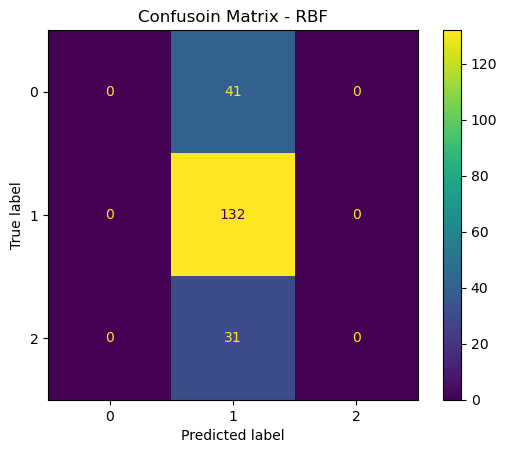

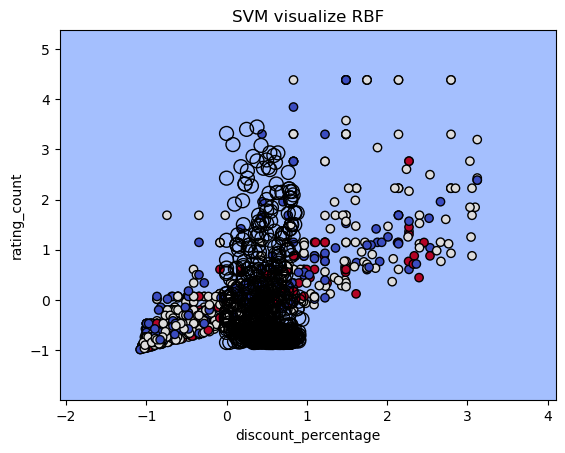

In [35]:
ker_list = ['sigmoid', 'poly', 'rbf']
cost_list = [1, 1.2, 1.5]
for i, k in enumerate(ker_list):
    print(f"Kernel: {k}\n")
    
    # SVM with diff kernel
    model = SVC(kernel=k, C=cost_list[i], degree=4, gamma='auto')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Evaluate the SVM
    print(classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.title('Confusoin Matrix - ' + k.upper())
    plt.savefig('img/naive_cm_' + k + '.png')
    plt.show()


    # Visualize training with two features
    model = SVC(kernel=k, C=3, degree=4, gamma='auto')
    model.fit(X_vis_train, y_train)
    
    y_pred = model.predict(X_vis_test)
    
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o')

    plt.xlabel('discount_percentage')
    plt.ylabel('rating_count')
    plt.title('SVM visualize ' + k.upper())
    plt.savefig('img/svm_vis_' + k + '.png')

    plt.show()
    





